In [165]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#Importing GaussianMixture to use its built-in BIC function.
from sklearn.mixture import GaussianMixture

In [166]:
#dfelectricalUsage = pd.read_csv("daily_electricity_usage 2.csv",parse_dates=thedate)
#dfelectricalUsage.count()

dfElectricalUsage = pd.read_csv('daily_electricity_usage.csv', index_col=1, parse_dates=True)
dfElectricalUsage.head()


,Meter ID,total daily KW
date,,
2009-07-14,1000,11.203
2009-07-15,1000,8.403
2009-07-16,1000,7.225
2009-07-17,1000,11.338
2009-07-18,1000,11.306


## Cleaning data

In [167]:
min_date = dfElectricalUsage.index.min() 
max_date = dfElectricalUsage.index.max()

period = pd.date_range(min_date, max_date) #Date range from first to last date.
meter_ids = dfElectricalUsage['Meter ID'].unique() #Getting the meter ids.

for meter_id in meter_ids:
    if len(dfElectricalUsage[dfElectricalUsage['Meter ID'] == meter_id]) == 536: #If a meter id has all the dates, we skip it.
        continue
        
    #print(meter_id) #Printing meter ids that need to be filled.
    
    ind = dfElectricalUsage['Meter ID'] == meter_id
    dfElectricalUsage[ind] = dfElectricalUsage[ind].loc[period]
    
    #First fill meter ids. Using ffill AND bfill in case first or last date is missing.
    dfElectricalUsage[ind]['Meter ID'] = dfElectricalUsage[ind]['Meter ID'].ffill().bfill()
    #Filling the missing values with the mean.    
    dfElectricalUsage[ind]['total daily KW'].fillna(dfElectricalUsage[ind].mean()[1], inplace = True)

/Users/funkyapps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/funkyapps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/funkyapps/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

In [168]:
#print(dfelectricalUsage.head())  
#setting date column as index column for better lookupolloøopøløolopoplpø--

#print(dfelectricalUsage.tail())
#print(dfelectricalUsage.count())
#print(dfelectricalUsage.dtypes)

In [169]:
#dfelectricalUsage.drop_duplicates()   -- there are no duplicates

In [170]:
df = dfElectricalUsage.groupby('Meter ID').nunique()
print("Total # of cunsumers", df.count())

Total # of cunsumers Meter ID          6435
total daily KW    6435
dtype: int64


## Adding calender features to dataset ##

In [171]:
from datetime import date
import calendar
my_date = date.today()
calendar.day_name[my_date.weekday()]

'Wednesday'

In [172]:
column_1 = dfElectricalUsage.iloc[:,0]
column_1
#Tried using next line since index_col was changed to 'date'.
#column_1 = dfElectricalUsage.reset_index().set_index('Meter ID').iloc[:,0]
dfElectricalUsage

dfElectricalUsage = pd.DataFrame({"date":dfElectricalUsage.index,
                               "year": dfElectricalUsage.index.year,
                               "month": dfElectricalUsage.index.month,
                               "day": dfElectricalUsage.index.day,
                               "dayofyear": dfElectricalUsage.index.dayofyear,
                               "weekofyear": dfElectricalUsage.index.weekofyear,
                               "weekday": dfElectricalUsage.index.weekday,
                               "quarter": dfElectricalUsage.index.quarter,
                               "DailyUsage": dfElectricalUsage['total daily KW'],
                               "Meter ID": dfElectricalUsage['Meter ID']})

print(dfElectricalUsage.head())

                 date  year  month  day  dayofyear  weekofyear  weekday  \
date                                                                      
2009-07-14 2009-07-14  2009      7   14        195          29        1   
2009-07-15 2009-07-15  2009      7   15        196          29        2   
2009-07-16 2009-07-16  2009      7   16        197          29        3   
2009-07-17 2009-07-17  2009      7   17        198          29        4   
2009-07-18 2009-07-18  2009      7   18        199          29        5   

            quarter  DailyUsage  Meter ID  
date                                       
2009-07-14        3      11.203    1000.0  
2009-07-15        3       8.403    1000.0  
2009-07-16        3       7.225    1000.0  
2009-07-17        3      11.338    1000.0  
2009-07-18        3      11.306    1000.0  


In [173]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start='2009-07-14', end='2010-10-17')
dfElectricalUsage['Holiday'] = dfElectricalUsage.index.isin(holidays)
dfElectricalUsageOnlyHoliday = dfElectricalUsage[dfElectricalUsage['Holiday']== True]
print(dfElectricalUsageOnlyHoliday)

                 date  year  month  day  dayofyear  weekofyear  weekday  \
date                                                                      
2009-09-07 2009-09-07  2009      9    7        250          37        0   
2009-10-12 2009-10-12  2009     10   12        285          42        0   
2009-11-11 2009-11-11  2009     11   11        315          46        2   
2009-11-26 2009-11-26  2009     11   26        330          48        3   
2009-12-25 2009-12-25  2009     12   25        359          52        4   
2010-01-01 2010-01-01  2010      1    1          1          53        4   
2010-01-18 2010-01-18  2010      1   18         18           3        0   
2010-02-15 2010-02-15  2010      2   15         46           7        0   
2010-05-31 2010-05-31  2010      5   31        151          22        0   
2010-07-05 2010-07-05  2010      7    5        186          27        0   
2010-09-06 2010-09-06  2010      9    6        249          36        0   
2010-10-11 2010-10-11  20

**Segementation code** 

In [174]:
#daily Average per user
dfElectricalUsage.head()
dfUserGroup = dfElectricalUsage.groupby('Meter ID')['DailyUsage'].mean().reset_index(name='DailyAvgPerUser')

#Quarterly Average per user
dfUserGroup2 = dfElectricalUsage.groupby(['Meter ID','quarter'])['DailyUsage'].mean().reset_index(name='qtlylyAvgPerUser')

# Weekday Average per user
dfUserGroup3 = dfElectricalUsage.groupby(['Meter ID','weekday'])['DailyUsage'].mean().reset_index(name='weekdayAvgPerUser')
#dfUserGroup4 = dfElectricalUsage.groupby(['Meter ID','weekday'])['DailyUsage'].mean().reset_index(name='weekdayAvgPerUser')
#dfUserGroup5 = dfElectricalUsage.groupby(['Meter ID','weekday'])
#dfUserGroup6= dfUserGroup5[dfUserGroup5['weekday'] == 5 or dfUserGroup5['weekday'] == 6]

# Merging groups to one dataframe
dfElectricityUsage1 = pd.merge(dfUserGroup,dfUserGroup2,on='Meter ID')
dfElectricityUsage = pd.merge(dfElectricityUsage1,dfUserGroup3,on='Meter ID')
dfElectricityUsage


,Meter ID,DailyAvgPerUser,quarter,qtlylyAvgPerUser,weekday,weekdayAvgPerUser
0,1000.0,10.290438,1,12.184656,0,10.029066
1,1000.0,10.290438,1,12.184656,1,10.493675
2,1000.0,10.290438,1,12.184656,2,10.596247
3,1000.0,10.290438,1,12.184656,3,9.203974
4,1000.0,10.290438,1,12.184656,4,9.956896
5,1000.0,10.290438,1,12.184656,5,11.216776
6,1000.0,10.290438,1,12.184656,6,10.548421
7,1000.0,10.290438,2,7.886923,0,10.029066
8,1000.0,10.290438,2,7.886923,1,10.493675
9,1000.0,10.290438,2,7.886923,2,10.596247


**K-Means Clustering**


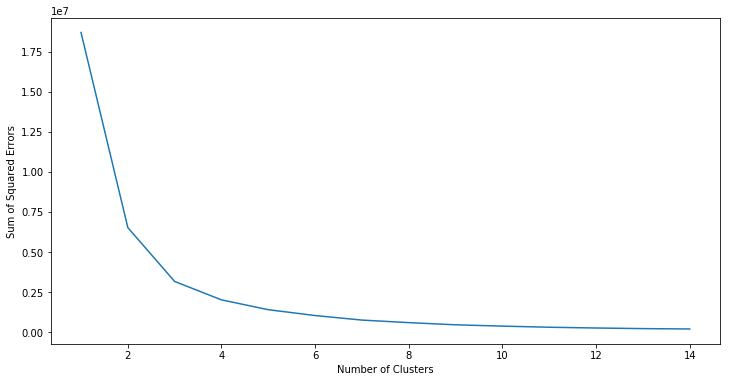

In [175]:
features = dfUserGroup.iloc[:, 1:]

SSE = {}
for k in range(1, 15):
    model = KMeans(n_clusters = k).fit(features)
    #features["clusters"] = model.labels_
    SSE[k] = model.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure(figsize = (12,6))
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

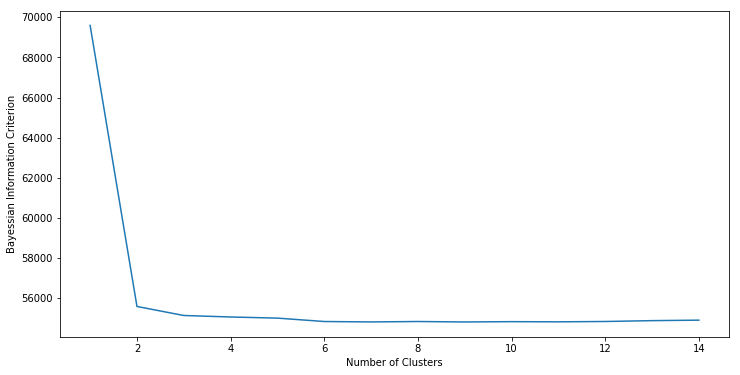

In [176]:
BIC = {}

for k in range(1, 15):
    model = GaussianMixture(n_components = k, init_params = 'kmeans').fit(features)
    BIC[k] = model.bic(features)

plt.figure(figsize = (12,6))
plt.plot(list(BIC.keys()), list(BIC.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Bayessian Information Criterion")
plt.show()

In [164]:
k_means = KMeans(n_clusters = 3).fit(features) #Using 3 clusters, change this after adding more features.
features['Cluster'] = k_means.fit_predict(features)
print(features.head())
features.Cluster.value_counts()


   DailyAvgPerUser  Cluster
0        10.290438        0
1         9.496968        0
2         9.986623        0
3        30.420860        0
4        47.250825        0


0    6155
2     242
1      38
Name: Cluster, dtype: int64